In [80]:
import psycopg2
from psycopg2.extensions import connection

In [81]:
from dotenv import load_dotenv
import os
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
offset = 140
limit = 50

In [82]:
conn = psycopg2.connect(f"dbname={DB_NAME} user={DB_USER} password={DB_PASSWORD} host=localhost")

In [83]:
table = "social_network"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table} OFFSET {offset} LIMIT {limit}")
raw_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

# Create a dataframe
import pandas as pd
df = pd.DataFrame(raw_data, columns=column_names)
df.head()

,id,compose_post_service_cpu,compose_post_service_memory,compose_post_service_replicas,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_redis_replicas,home_timeline_service_cpu,home_timeline_service_memory,home_timeline_service_replicas,...,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_mongodb_replicas,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_redis_replicas,user_timeline_service_cpu,user_timeline_service_memory,user_timeline_service_replicas,timestamp
0,141,120.11071,11.471094,4,90.340820,79.575000,5,47.15103,7.557812,5,...,367.244975,332.841797,2,87.29405,35.242188,1,289.70385,64.789062,1,1720959451
1,142,112.42076,12.110938,5,100.750970,112.835156,5,39.99077,7.623437,5,...,382.771250,610.183594,1,188.39270,36.906250,1,142.63280,64.789062,1,1720959461
2,143,109.48791,11.125781,3,137.184390,89.146094,5,42.62982,6.752344,5,...,285.800050,613.207031,1,101.09865,36.906250,1,93.62995,45.843750,1,1720959471
3,144,130.11687,4.242969,4,67.697820,93.146094,5,40.20250,5.981250,5,...,462.753400,613.125000,1,26.58725,37.437500,1,174.84060,36.867188,1,1720959481
4,145,83.50077,4.087500,4,44.501513,118.472656,4,41.25349,6.019531,5,...,176.953350,613.125000,1,26.58725,37.437500,1,158.35400,36.730469,1,1720959491


In [84]:
table = "social_network_predicted"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table} OFFSET {offset - 30} LIMIT {limit}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

# Create a dataframe

import pandas as pd
df_predicted = pd.DataFrame(raw_predicted_data, columns=column_names)
df_predicted.head()

,id,compose_post_service_cpu,compose_post_service_memory,compose_post_service_replicas,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_redis_replicas,home_timeline_service_cpu,home_timeline_service_memory,home_timeline_service_replicas,...,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_mongodb_replicas,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_redis_replicas,user_timeline_service_cpu,user_timeline_service_memory,user_timeline_service_replicas,timestamp
0,111,145.802378,0.0,0,218.141302,431.348085,0,207.087856,12.012140,0,...,105.710618,254.872392,0,73.744601,37.880272,0,126.066211,53.355697,0,1720959451
1,112,281.705513,0.0,0,175.541118,360.549897,0,263.632711,10.492417,0,...,15.713010,212.016391,0,54.632989,22.926220,0,123.363023,52.570147,0,1720959461
2,113,119.215965,0.0,0,190.454885,358.656377,0,190.049132,8.040281,0,...,163.165212,267.907764,0,72.697324,0.000000,0,118.277394,44.278567,0,1720959471
3,114,258.691098,0.0,0,182.051107,323.545426,0,262.160842,7.193093,0,...,32.996140,232.096691,0,55.688667,0.000000,0,119.053565,38.550757,0,1720959481
4,115,196.847912,0.0,0,151.461110,314.063907,0,216.621524,3.542532,0,...,102.879904,258.436393,0,27.308362,0.000000,0,85.530374,39.146487,0,1720959491


In [85]:
from sklearn.metrics import root_mean_squared_error, root_mean_squared_error

rmse = {}

df_actual = df[df["timestamp"].isin(df_predicted["timestamp"])].fillna(0).clip(lower=0)
df_predicted = df_predicted[df_predicted["timestamp"].isin(df_actual["timestamp"])].fillna(0).clip(lower=0)

for i, metric in enumerate(df.columns[1:][:-1]):
    try:
        rmse[metric] = root_mean_squared_error(df_actual[metric].to_list(), df_predicted[metric].to_list())
    except:
        print(f"Error in metric: {metric}")
        print(f"Actual: {df_actual[metric]}")
        print(f"Predicted: {df_predicted[metric]}")

series_rmse = pd.Series(rmse)

In [86]:
df_actual["nginx_thrift_cpu"].to_list()

[26.397700000002104,
 0.0,
 0.0,
 41.84455000000162,
 55.23818333333113,
 90.23066666666716,
 97.14951666666765,
 87.07634999999745,
 92.81704999999764,
 145.2739499999994,
 91.38470000000177,
 106.14805000000149,
 81.70779999999806,
 16.7036250000016,
 2.2160750000050484,
 0.005474999999819374,
 0.011749999993480743,
 59.061899999994786,
 59.057250000000934,
 190.06620000000112,
 190.06620000000112,
 218.23070000000297,
 375.73510000000243,
 275.1660499999998,
 0.0,
 0.0,
 99.72746666666576,
 78.62590000000142,
 27.061750000001023,
 0.0,
 0.6275999999988585,
 1.8693750000054479,
 1.8680000000046562,
 0.005249999987427145,
 0.2873499999870546,
 0.2820999999996275,
 0.010450000001583248,
 0.834499999997206,
 0.8240499999956228,
 5.058000000007451,
 5.058000000007451,
 0.26204999999608847,
 153.51119999999645,
 1142.4203000000095,
 989.1711500000092,
 654.9057749999951,
 187.355039999998,
 1109.0023500000127,
 2535.2529499999946,
 1426.250599999982]

In [87]:
df_predicted["nginx_thrift_cpu"].to_list()

[186.99447810649872,
 213.4636640548706,
 130.48428297042847,
 184.74267423152924,
 142.23948121070862,
 90.26595205068588,
 181.4785599708557,
 143.7673568725586,
 120.17117440700531,
 195.04857063293457,
 162.7240926027298,
 115.81538617610931,
 144.0671682357788,
 76.91878080368042,
 11.334508657455444,
 29.202645644545555,
 12.162435799837112,
 65.56922197341919,
 46.35636508464813,
 177.30598151683807,
 193.99301707744598,
 205.63089847564697,
 211.45501732826233,
 242.58188903331757,
 182.54877626895905,
 127.02760100364685,
 201.6373574733734,
 164.23505544662476,
 218.84110569953918,
 140.0393843650818,
 52.32233554124832,
 81.53608441352844,
 42.68098622560501,
 39.79906439781189,
 35.127319395542145,
 32.49168023467064,
 37.33021393418312,
 24.941664189100266,
 33.22197496891022,
 30.736522749066353,
 40.58552533388138,
 39.12801668047905,
 33.27227011322975,
 332.38187432289124,
 925.2533912658691,
 389.21529054641724,
 162.92154788970947,
 8.631393313407898,
 476.7946302890

In [88]:
series_rmse["nginx_thrift_cpu"]

363.90633322152735

In [89]:
series_rmse

compose_post_service_cpu          114.663891
compose_post_service_memory         9.788780
compose_post_service_replicas       3.152777
home_timeline_redis_cpu            73.516326
home_timeline_redis_memory        227.025848
                                     ...    
user_timeline_redis_memory         51.899792
user_timeline_redis_replicas        1.000000
user_timeline_service_cpu          77.954029
user_timeline_service_memory       21.180663
user_timeline_service_replicas      1.319091
Length: 81, dtype: float64

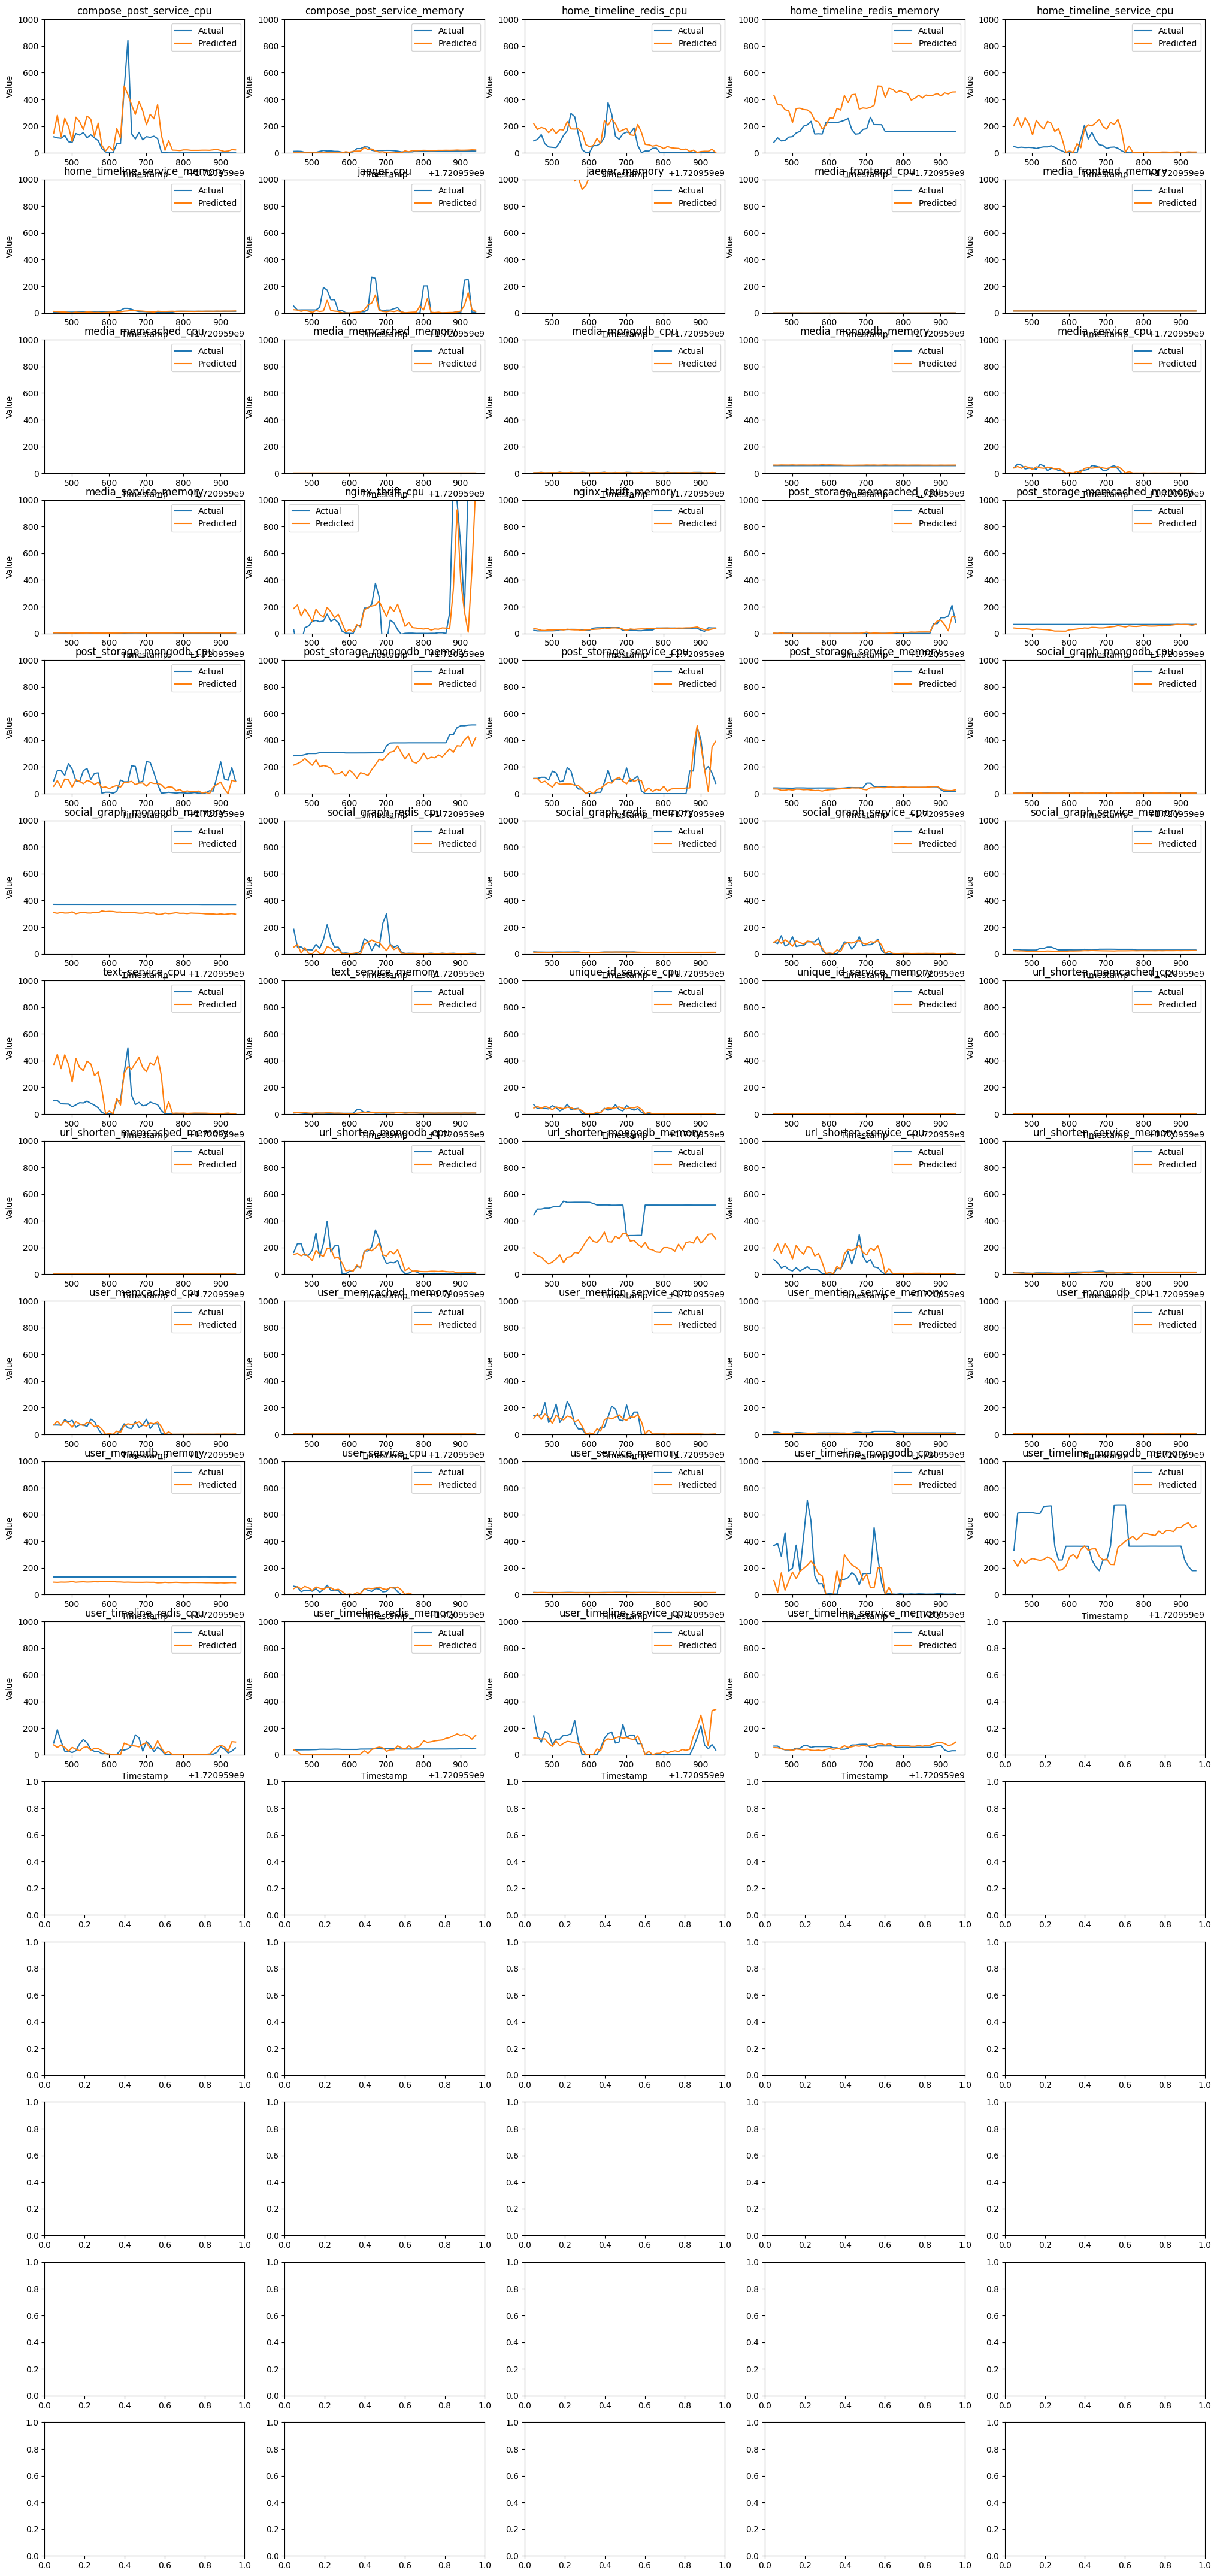

In [90]:
# Plot the data using line plot
import matplotlib.pyplot as plt
# Create 5x5 grid of subplots
fig, axes = plt.subplots(16, 5, figsize=(25, 55))
# Flatten the axes array
axes = axes.flatten()
# Plot each metric
df.drop([col for col in df.columns if col.endswith("_replicas")], axis=1, inplace=True)
for i, metric in enumerate(df.columns[1:][:-1]):
    axes[i].plot(df['timestamp'], df[metric], label='Actual')
    axes[i].plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Value')
    # Set max y-axis limit to 1000
    axes[i].set_ylim(0, 1000)
    axes[i].legend()

In [ ]:
series_rmse.to_csv(f"rmse-{input()}.csv")

In [ ]:
fig.savefig(input())

In [ ]:
table = "social_network_replicas"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
replicas = cur.fetchall()
replicas_column_names = [desc[0] for desc in cur.description]
cur.close()

In [ ]:
# Create a dataframe
replica_df = pd.DataFrame(replicas, columns=replicas_column_names)
replica_df

,id,compose_post_service,home_timeline_redis,home_timeline_service,jaeger,media_frontend,media_memcached,media_mongodb,media_service,nginx_thrift,...,url_shorten_mongodb,url_shorten_service,user_memcached,user_mention_service,user_mongodb,user_service,user_timeline_mongodb,user_timeline_redis,user_timeline_service,timestamp
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720958006
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720958016
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720958026
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720958036
4,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720958048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1720961148
312,313,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1720961158
313,314,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1720961168
314,315,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1720961178


In [ ]:
i = 2
replica_df[replicas_column_names[i]]

0      1
1      1
2      1
3      1
4      1
      ..
311    2
312    2
313    2
314    2
315    2
Name: home_timeline_redis, Length: 316, dtype: int64

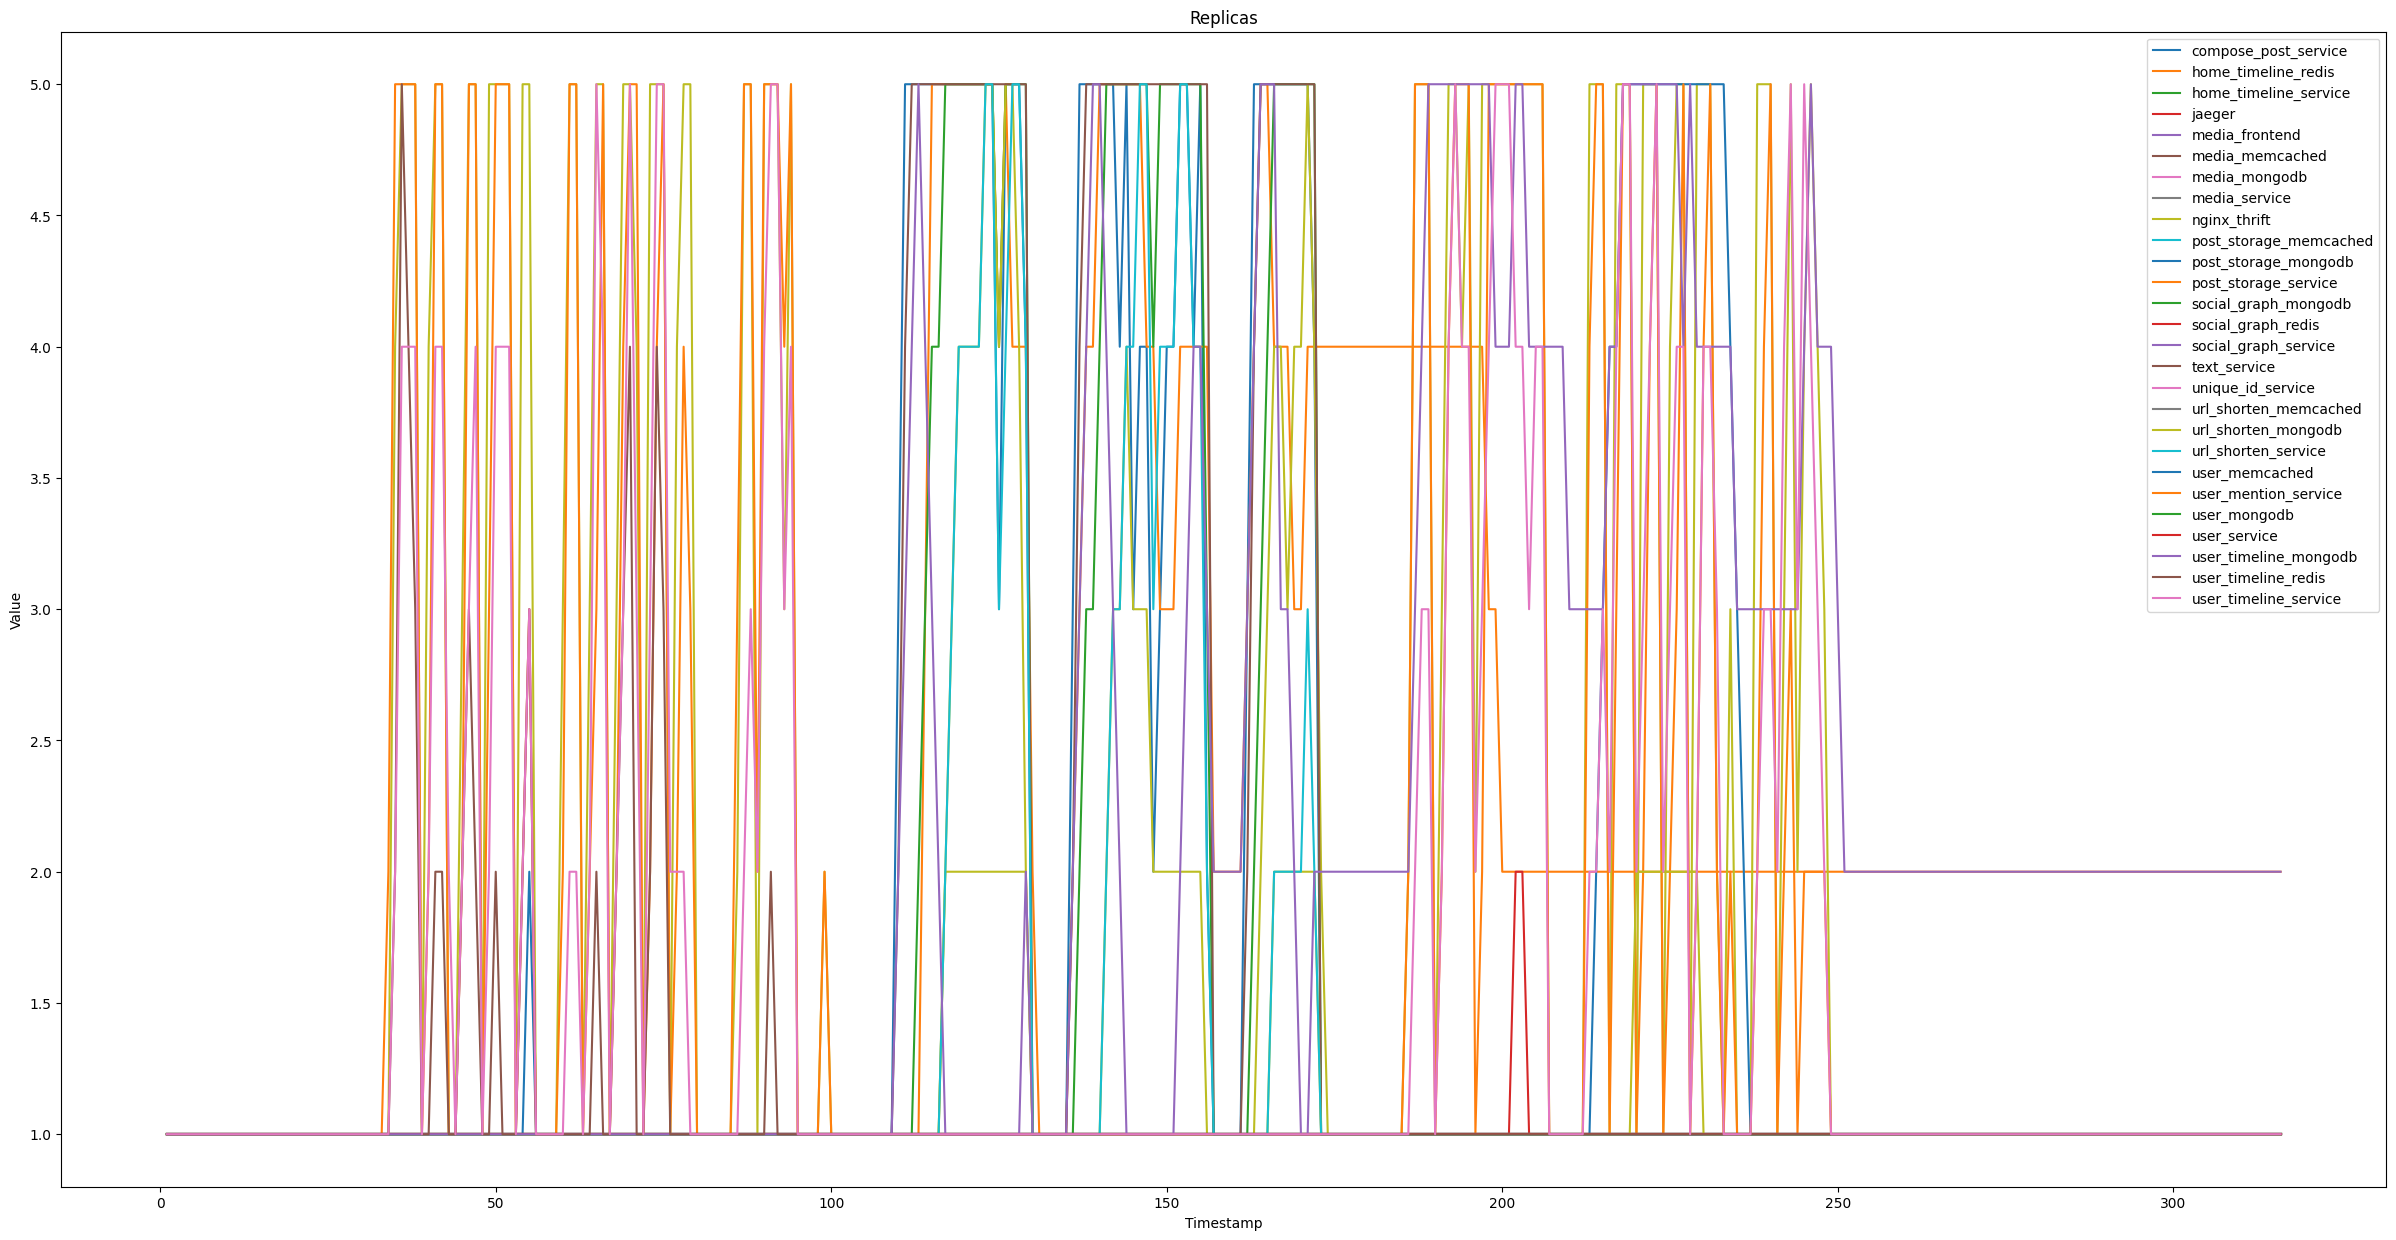

In [ ]:
# Plot the data using line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
for replicas_column_name in replicas_column_names[1:]:
    if replicas_column_name == "timestamp":
        continue
    plt.plot(replica_df["id"], replica_df[replicas_column_name], label=replicas_column_name)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Replicas')
plt.legend()
plt.show()


In [ ]:
cur.close()